Diabetes Prediction

The dataset contains 768 rows with 9 feature set.

Pregnancies: indicates the number of pregnancies

Glucose: indicates the plasma glucose concentration

Blood Pressure: indicates diastolic blood pressure in mm/Hg

Skin Thickness: indicates triceps skinfold thickness in mm

Insulin: indicates insulin in U/mL

BMI: indicates the body mass index in kg/m2

Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history

Age: indicates the age of the person

Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no)

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("test_diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,Zero,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,N
766,1.0,126.0,60.0,0.0,Zero,30.1,0.349,47.0,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,731.000000,730.000000,734.000000,734.000000,733.000000,728.000000,717.000000
mean,3.824897,121.152055,69.008174,20.848774,31.979536,0.472702,34.108787
std,3.369400,31.774802,19.496036,15.876665,7.918709,0.331714,16.119730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,-1.000000
25%,1.000000,99.000000,64.000000,0.000000,27.400000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,32.000000,36.500000,0.624500,41.000000
max,17.000000,198.000000,122.000000,99.000000,67.100000,2.420000,200.000000


In [8]:
data.describe(include='object')

,Insulin,Outcome
count,717,768
unique,182,4
top,Zero,0
freq,346,339


In [9]:
data.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                51
Insulin                     182
BMI                         241
DiabetesPedigreeFunction    491
Age                          57
Outcome                       4
dtype: int64

In [10]:
data.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [11]:
data['Outcome'].value_counts()

0    339
1    177
N    161
Y     91
Name: Outcome, dtype: int64

In [12]:
data['Insulin'].value_counts()

Zero    346
105      11
140       8
130       8
94        7
       ... 
237       1
183       1
18        1
41        1
171       1
Name: Insulin, Length: 182, dtype: int64

In [13]:
# missing values
data.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [14]:

#filling missing values
print(data.Pregnancies.median())
print(data.Pregnancies.mode())
print(data.Pregnancies.mean())

3.0
0    1.0
dtype: float64
3.8248974008207934


In [15]:
print(data.Glucose.median())
print(data.BloodPressure.median())
print(data.SkinThickness.median())
print(data.BMI.median())
print(data.DiabetesPedigreeFunction.median())
print(data.Age.median())

117.0
72.0
23.0
32.0
0.3725
29.0


In [16]:
data = data.replace({'Insulin': {'Zero':0}})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [18]:
data['Insulin'].value_counts()

0      346
105     11
140      8
130      8
94       7
      ... 
237      1
183      1
18       1
41       1
300      1
Name: Insulin, Length: 182, dtype: int64

In [19]:
data['Insulin']=data['Insulin'].fillna((data['Insulin'].median()))

In [20]:
data['Pregnancies']=data['Pregnancies'].fillna((data['Pregnancies'].median()))
data['Glucose']=data['Glucose'].fillna((data['Glucose'].median()))
data['BloodPressure']=data['BloodPressure'].fillna((data['BloodPressure'].median()))
data['SkinThickness']=data['SkinThickness'].fillna((data['SkinThickness'].median()))
data['BMI']=data['BMI'].fillna((data['BMI'].median()))
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].fillna((data['DiabetesPedigreeFunction'].median()))
data['Age']=data['Age'].fillna((data['Age'].median()))

In [21]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
# data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

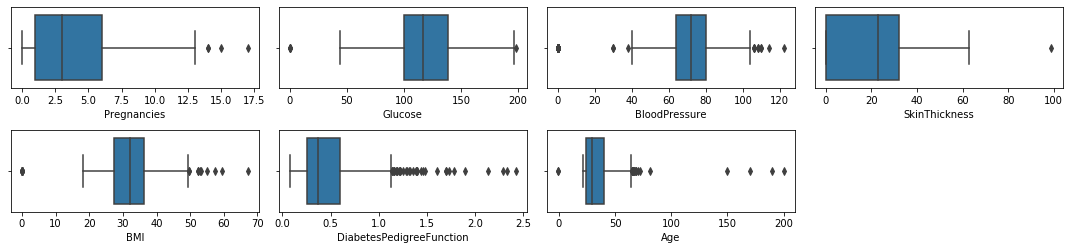

In [22]:
#boxplot
df_numerical = data.select_dtypes(exclude='object')
x=1
plt.figure(figsize = (15, 10))
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

In [23]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction',
        'Age']:
      index_list.extend(outliers(data,feature))
index_list

#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

data=remove(data,index_list)

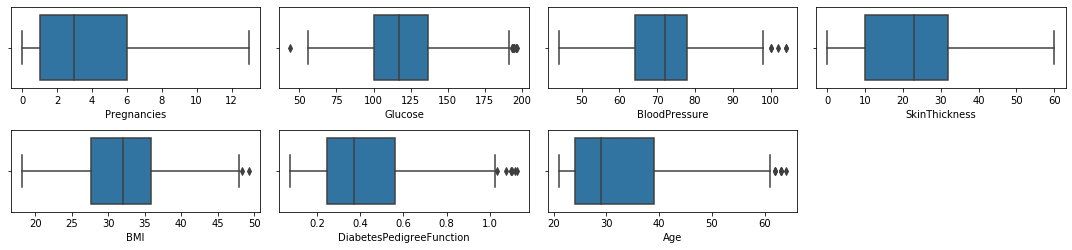

In [24]:
#plotting the boxplot to find the outliers
df_numerical = data.select_dtypes(exclude='object')
plt.figure(figsize = (15, 10))
x=1
int(x)
for col in df_numerical.columns:
    plt.subplot(6,4,x)
    sns.boxplot(data[col])
    x+=1
plt.tight_layout()

In [25]:
data['Insulin'].value_counts()

0       273
36.0     42
105      11
140       8
130       7
       ... 
142       1
51        1
330       1
146       1
271       1
Name: Insulin, Length: 173, dtype: int64

In [26]:
data.shape

(649, 9)

In [27]:
data = data.replace({'Outcome': {'Y': 1, 
                                'N': 0}})

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
5,5.0,116.0,74.0,23.0,0,25.6,0.201,30.0,0


In [29]:
data['Outcome'].value_counts()

0    309
1    142
0    134
1     64
Name: Outcome, dtype: int64

Exploratory Data Analysis

<function matplotlib.pyplot.show(*args, **kw)>

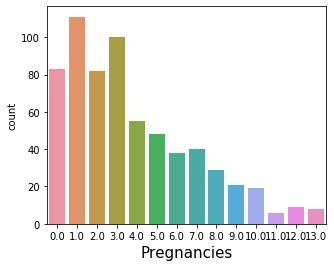

In [30]:
#Pregnancy graph
plt.figure(figsize=(5,4))
sns.countplot(data=data, x = 'Pregnancies')
plt.xlabel('Pregnancies', fontsize=15)
# print(data.Pregnancies)
plt.show

From the above graph pregnancy with value 1 has the highest count


Text(0, 0.5, 'Frequency')

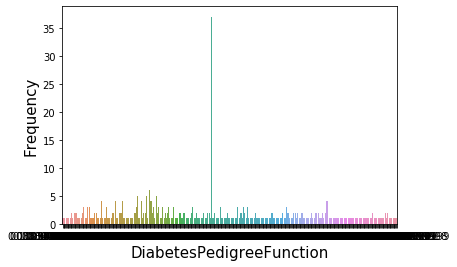

In [31]:
sns.countplot(x ='DiabetesPedigreeFunction', data = data)
plt.xlabel('DiabetesPedigreeFunction', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

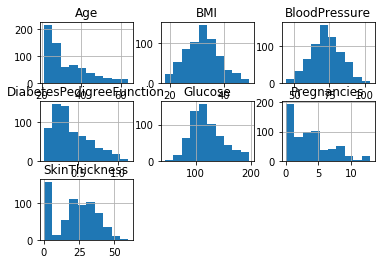

In [32]:
data.hist()
plt.show()

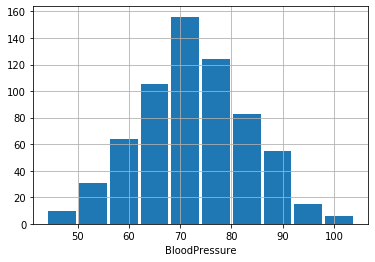

In [33]:
data.BloodPressure.hist(figsize = (6, 4),rwidth=0.9)
plt.xlabel('BloodPressure')
plt.show()

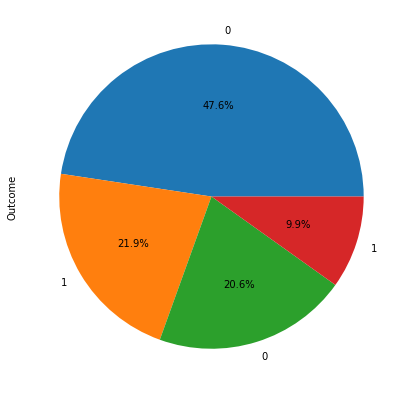

In [34]:
plt.figure(figsize=(7,7))
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

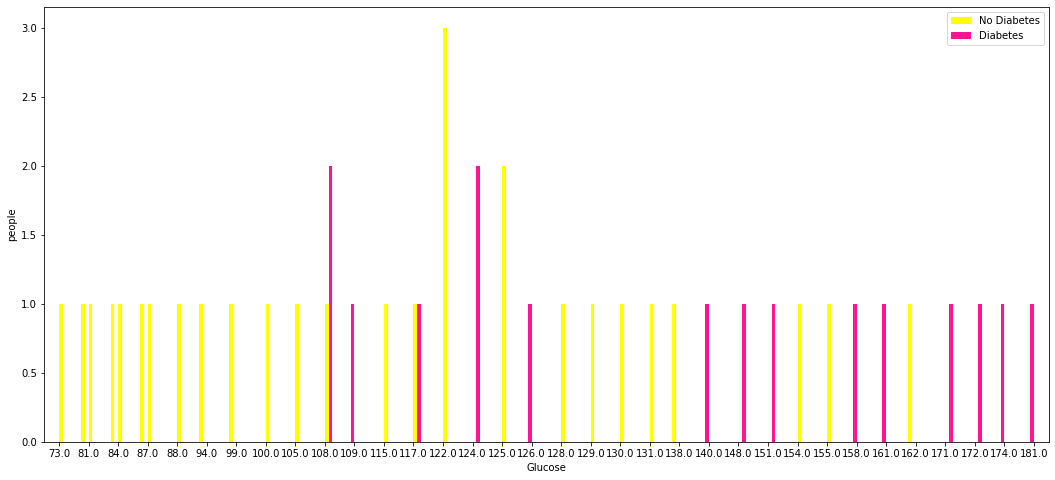

In [35]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

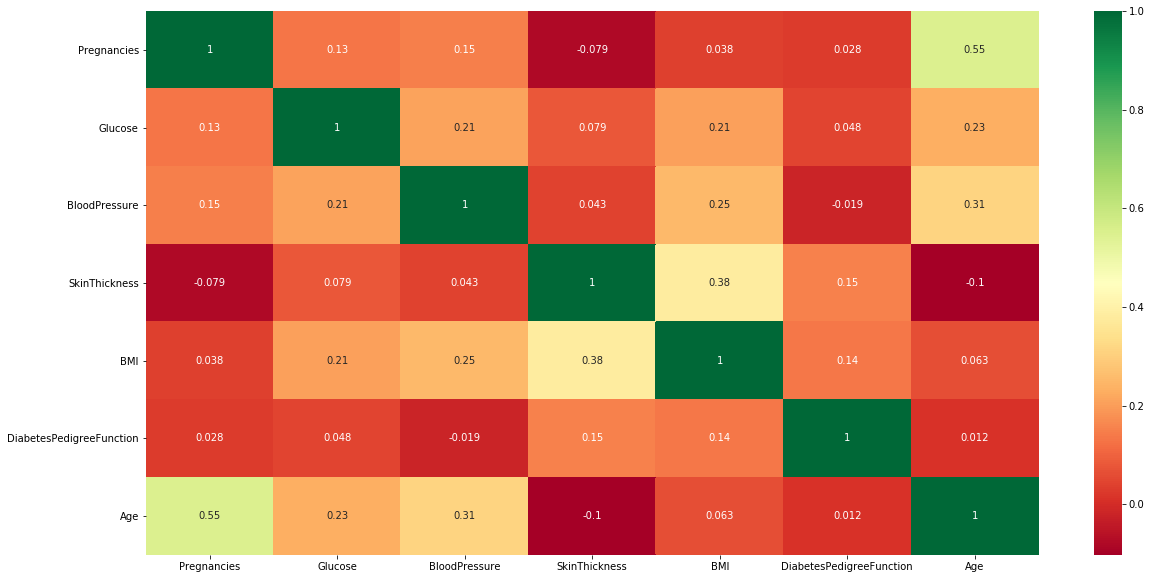

In [36]:
#Lets see the correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Insulin',
        'Age']
data[scale] = ss.fit_transform(data[scale])

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.236783,0.959302,0.017462,0.911981,-0.729451,0.256503,0.627,1.698382,1
1,-0.870482,-1.206038,-0.539880,0.505194,-0.729451,-0.881257,0.351,-0.119407,0
2,1.347464,2.162269,-0.725660,-1.460945,-0.729451,-1.417630,0.672,-0.023734,1
3,-0.870482,-1.068557,-0.539880,0.098406,0.116059,-0.637451,0.167,-1.076138,0
5,0.396916,-0.140554,0.203242,0.098406,-0.729451,-1.043794,0.201,-0.215080,0


In [39]:
new_data = data.drop(['Pregnancies','SkinThickness','Insulin'],axis=1)
new_data

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.959302,0.017462,0.256503,0.6270,1.698382,1
1,-1.206038,-0.539880,-0.881257,0.3510,-0.119407,0
2,2.162269,-0.725660,-1.417630,0.6720,-0.023734,1
3,-1.068557,-0.539880,-0.637451,0.1670,-1.076138,0
5,-0.140554,0.203242,-1.043794,0.2010,-0.215080,0
...,...,...,...,...,...,...
763,-0.656111,0.389022,0.142727,0.1710,2.942132,0
764,0.065669,-0.168319,0.776622,0.3400,-0.502100,0
765,0.031299,0.017462,-0.946272,0.2450,-0.215080,0
766,0.203151,-1.097221,-0.312377,0.3490,1.411363,1


In [40]:
x=new_data.drop(['Outcome'],axis=1)
x

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.959302,0.017462,0.256503,0.6270,1.698382
1,-1.206038,-0.539880,-0.881257,0.3510,-0.119407
2,2.162269,-0.725660,-1.417630,0.6720,-0.023734
3,-1.068557,-0.539880,-0.637451,0.1670,-1.076138
5,-0.140554,0.203242,-1.043794,0.2010,-0.215080
...,...,...,...,...,...
763,-0.656111,0.389022,0.142727,0.1710,2.942132
764,0.065669,-0.168319,0.776622,0.3400,-0.502100
765,0.031299,0.017462,-0.946272,0.2450,-0.215080
766,0.203151,-1.097221,-0.312377,0.3490,1.411363


In [41]:
y=new_data['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 649, dtype: object

In [42]:
x.shape

(649, 5)

In [43]:
y.shape

(649,)

Splitting the dataset

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [45]:
x_test

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
754,1.165525,0.574803,0.061459,0.443,1.220016
263,0.753079,0.760583,0.061459,0.200,2.942132
711,0.203151,0.574803,-0.393646,0.439,0.741651
511,0.649967,-0.911440,-1.612674,0.207,-1.076138
89,-0.449888,-0.354099,-0.897511,0.165,-0.789119
...,...,...,...,...,...
610,-0.484258,-1.654562,-0.182347,0.292,-0.789119
442,-0.106183,-0.725660,0.191488,0.230,-0.789119
527,-0.140554,0.203242,-0.930018,0.107,-0.789119
290,-1.446632,1.503705,0.792876,0.434,-1.076138


In [46]:
y_test

754    1
263    0
711    0
511    0
89     0
      ..
610    0
442    0
527    0
290    0
718    0
Name: Outcome, Length: 130, dtype: object

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
lr=LogisticRegression()

In [48]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [49]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[82, 10],
       [16, 22]], dtype=int64)

In [51]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.8


In [52]:
lr.score(x_train,y_train)  

0.7842003853564548

In [53]:
lr.score(x_test,y_test) #underfitting

0.8

Decision Tree:-
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
clfr=DecisionTreeClassifier(random_state=5)
clfr.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [56]:
y_pred=clfr.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [57]:
from sklearn import metrics

In [58]:
print(metrics.accuracy_score(y_test,y_pred))

0.7307692307692307


In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[74, 18],
       [17, 21]], dtype=int64)

In [61]:
clfr.score(x_train,y_train) #overfitting

1.0

In [62]:
clfr.score(x_test,y_test)

0.7307692307692307

Support vector machine :-
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane

In [63]:
from sklearn.svm import SVC

In [64]:
clf=SVC(kernel='linear') 
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [65]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[80, 12],
       [17, 21]], dtype=int64)

In [67]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.7769230769230769


In [68]:
clf.score(x_train,y_train)

0.7803468208092486

In [69]:
clf.score(x_test,y_test)

0.7769230769230769

Random Forest :-
Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc =  RandomForestClassifier(n_estimators=10,random_state=4)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=4)

In [72]:
y_pred=rfc.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test,y_pred))

0.7923076923076923


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[82, 10],
       [17, 21]], dtype=int64)

In [76]:
rfc.score(x_train,y_train)  #overfitting

0.9730250481695568

In [77]:
rfc.score(x_test,y_test)

0.7923076923076923

Naive Bayes:-
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [80]:
y_pred=gnb.predict(x_test)

In [81]:
print(metrics.accuracy_score(y_test,y_pred))

0.7692307692307693


In [82]:
gnb.score(x_test,y_test)

0.7692307692307693

In [83]:
gnb.score(x_train,y_train)

0.7687861271676301

K Nearest Neighbor:-
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [87]:
print(metrics.accuracy_score(y_test,y_pred))

0.7615384615384615


In [88]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[77, 15],
       [16, 22]], dtype=int64)

In [89]:
clf.score(x_train,y_train)

0.7976878612716763

In [90]:
clf.score(x_test,y_test)

0.7615384615384615

In [91]:
clf=KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [92]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
print(metrics.accuracy_score(y_test,y_pred))

0.7615384615384615


Ensemble Learning:-
Ensemble methods are techniques that aim at improving the accuracy of results in models by combining multiple models instead of using a single model. The combined models increase the accuracy of the results significantly.

Bagging:-
Bagging, the short form for bootstrap aggregating, is mainly applied in classification and regression. It increases the accuracy of models through decision trees, which reduces variance to a large extent. The reduction of variance increases accuracy, eliminating overfitting, which is a challenge to many predictive models.

In [94]:
from sklearn.ensemble import BaggingClassifier

In [95]:
bc=BaggingClassifier(max_samples=100,bootstrap=True)
bc.fit(x_train,y_train)

BaggingClassifier(max_samples=100)

In [96]:
y_pred=bc.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
print(metrics.accuracy_score(y_test,y_pred))

0.7230769230769231


In [98]:
print(bc.score(x_train,y_train))

0.8092485549132948


In [99]:
print(bc.score(x_test,y_test))

0.7230769230769231


Boosting:-
Boosting is an ensemble technique that learns from previous predictor mistakes to make better predictions in the future. The technique combines several weak base learners to form one strong learner, thus significantly improving the predictability of models. Boosting works by arranging weak learners in a sequence, such that weak learners learn from the next learner in the sequence to create better predictive models.

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
adaboost=AdaBoostClassifier(learning_rate=1)  #learning rate=1, learning rate is used to rectify errors
adaboost.fit(x_train,y_train)


AdaBoostClassifier(learning_rate=1)

In [102]:
y_pred=adaboost.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
print(metrics.accuracy_score(y_test,y_pred))

0.7923076923076923


In [104]:
print(adaboost.score(x_train,y_train))

0.8342967244701349


In [105]:
print(adaboost.score(x_test,y_test))

0.7923076923076923


Accuracy Obtained:-
Logistic Rgression : 0.8
Decision Tree : 0.73
SVM : 0.77
Random Forest : 0.79
Naive Bayes : 0.76
KNN : 0.76
Bagging : 0.75
Boosting : 0.79